# Profitable App Profiles for the App Store and Google Play Markets 🍎🤖
The objective of our project is to identify mobile application profiles that are lucrative in both the App Store and Google Play markets. As data analysts for a company specializing in Android and iOS app development, we aim to empower our developer team to make informed decisions based on data analysis.

Within our company, we exclusively develop apps that can be downloaded and installed for free, relying primarily on in-app advertisements for revenue. Consequently, the app's revenue is heavily tied to the user base. Our project's goal is to analyze data to assist our developers in comprehending the types of apps that are more likely to draw in a larger user audience.


As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

![img](https://s3.amazonaws.com/dq-content/350/py1m8_statista.png) 
Source: [Statista](https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/)


Gathering data for over four million applications necessitates a considerable investment of both time and finances. As an alternative approach, we intend to analyze a representative sample of data. Before allocating resources to acquire new data, we should initially investigate the possibility of finding pertinent existing data without incurring additional costs. Fortunately, we've identified two data sets that align with our objectives:

1. A data set comprising information on roughly ten thousand Android apps available on Google Play. You can access and download this data set directly from the provided link.
2. Another data set containing details about approximately seven thousand iOS apps accessible on the App Store. This data set is also available for download through the provided link.
Our initial step will involve examining these two data sets to kickstart our data exploration process.

In [1]:
# The Google Play Data Set #
opened_file = open('googleplaystore.csv', encoding="utf8")
from csv import reader
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

### The App Store Data Set ###
opened_file = open('AppleStore.csv', encoding="utf8")
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

# Data Exploration 🚢

In [2]:
#  Data exploration function
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

# Android Apps 🤖

In [3]:
print(android_header)
print('\n')
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


# IOS Apps 🍎

In [4]:
print(ios_header)
print('\n')
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


#  Deleting Wrong Data ❌
In the previous step, we opened the two datasets and explored the data. Before beginning our analysis, we need to make sure the data we analyze is accurate, or the results of our analysis will be wrong. This means that we need to:

* Detect inaccurate data, and correct or remove it.
* Detect duplicate data, and remove the duplicates.

The Google Play data set has a dedicated discussion section, and we can see that one of the [discussions](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/66015) outlines an error for row **10472**. Let's print this row and compare it against the header and another row that is correct.

In [5]:
print(android[10472])  # incorrect row
print('\n')
print(android_header)  # header
print('\n')
print(android[0]) # correct row

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


The row 10472 corresponds to the app Life Made WI-Fi Touchscreen Photo Frame, and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play app is 5 (as mentioned in the discussions section, **this problem is caused by a missing value in the 'Category'** column). As a consequence, we'll delete this row.

In [6]:
print(len(android)) # Before
del android[10472]  # Deletion, run only once
print(len(android)) # After

10841
10840


# Removing Duplicate Entries Part One: Counting Duplicates 🤹🏾‍♂️
If you explore the Google Play data set long enough or look at the [discussions](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion) section, you'll notice some apps have duplicate entries. For instance, Instagram has four entries:

In [7]:
for app in android:
    name  = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In total, there are 1,181 cases where an app occurs more than once:

# Removing Duplicate Entries Part Two: Let's build a dictionary 📖

In [8]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

print('Number of duplicate apps: ',len(duplicate_apps))
print('\n')
print('Examples of duplicate apps: ',duplicate_apps[:15])

Number of duplicate apps:  1181


Examples of duplicate apps:  ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


However, it's important to note that we should avoid counting apps multiple times during our data analysis. Therefore, we must eliminate duplicate entries and retain only a single entry for each app.

Upon reviewing the printed rows for the Instagram app, a notable discrepancy is observed in the fourth position of each row, representing the number of reviews.

The varying numbers indicate that the data was gathered at different points in time. We'll opt to retain the row with the highest number of reviews, as it signifies the most recent and trustworthy data.

In [9]:
reviews_max = {}
for app in android:
    name = app[0] 
    n_reviews = float(app[3]) 
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

In a previous code cell, we found that there are 1,181 cases where an app occurs more than once, so the length of our dictionary (of unique apps) should be equal to the difference between the length of our data set and 1,181.

In [10]:
print('Expected length:', (len(android)-len(duplicate_apps)))
print('Actual length:', len(reviews_max))

Expected length: 9659
Actual length: 9659


Let's proceed to eliminate duplicates using the reviews_max dictionary. In the code cell below:

* We commence by initializing two empty lists: android_clean and already_added.
* Iterating through the android dataset, for each iteration:
* We extract the app name and its respective review count.
* If the current app's review count matches the count stored in the reviews_max dictionary and the app name is not already in the already_added list, we include the current row (app) in the android_clean list and add the app name (name) to the already_added list. This additional condition is necessary to handle cases where multiple entries for an app have the same highest review count (e.g., the Box app has three entries with identical review counts). A simple check of reviews_max[name] == n_reviews wouldn't suffice as it would lead to duplicate entries for certain apps.

In [11]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name) 

Now let's quickly explore the new data set, and confirm that the number of rows is 9,659.

In [12]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


We have 9659 rows, just as expected.

# Removing Non-English Apps: Part One 🈹
If you explore the data sets enough, you'll notice the names of some of the apps suggest they are not directed toward an English-speaking audience. Below, we see a couple of examples from both data sets:

In [13]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


In this instance, our focus is exclusively on apps with names in the English language; therefore, we will exclude those with names in other languages.

One method to achieve this is by filtering out apps whose names contain symbols uncommon in standard English text. Standard English text typically comprises letters from the English alphabet, numerical digits from 0 to 9, common punctuation marks, as well as specific symbols like (+, *, /).

These characters, distinctive to English text, are encoded using the ASCII system, where each character is assigned a corresponding number between 0 and 127. Utilizing the built-in function ord(), we can determine the respective number for a given character.

With this framework, we can construct a function to determine whether a character is part of the standard English character set. If an app name includes a character with a numerical value exceeding 127, it's probable that the app is named in a language other than English.

In [14]:
def is_english(string):
    for character in string:
        if ord(character)>127:
            return False
    return True    

We can check if an app name is English or non-English using the function we created above

In [15]:
is_english('Instagram')

True

In [16]:
is_english('爱奇艺PPS -《欢乐颂2》电视剧热播')

False

In [17]:
is_english('Docs To Go™ Free Office Suite')

False

In [18]:
is_english('Instachat 😜')

False

The function appears to be effective, but it's worth noting that certain English app names incorporate emojis or special symbols (™, — (em dash), – (en dash), etc.) that lie beyond the ASCII range. As a result, if we apply the function as it stands, we risk excluding valid English apps that use these characters.

In [19]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
True


The function isn't flawless, and a small number of non-English apps might still pass through our filter. However, at this stage of our analysis, it seems sufficiently effective. We shouldn't dwell too long on perfecting it at this moment.

Below, we employ the is_english() function to screen out non-English apps from both datasets:

In [20]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[1]
    if is_english(name):
        ios_english.append(app)
        
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

# Isolating the Free Apps 🏝️
As stated in the introduction, our development is limited to apps that are free to download and install, relying primarily on in-app advertisements for revenue. In our datasets, we have a mix of free and non-free apps, and it's crucial to narrow down our analysis to focus solely on the free apps. Below, we extract and isolate the free apps from both of our datasets.

In [21]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)
        
print(len(android_final))
print(len(ios_final))

8864
3222


We're left with 8864 Android apps and 3222 iOS apps, which should be enough for our analysis.

# Most Common Apps by Genre 🪢

# Part One ☝🏾
As emphasized in the introduction, our primary objective is to identify app categories likely to attract a substantial user base since our revenue is significantly impacted by the app's user count.

To mitigate risks and manage costs, we've outlined a validation strategy for app ideas, structured into three key steps:

1. Develop a basic Android version of the app and release it on Google Play.
2. If the app receives a positive response from users, proceed with further development.
3. If the app proves profitable within six months, extend the development to create an iOS version and publish it on the App Store.

Given our ultimate goal of publishing the app on both Google Play and the App Store, we seek app profiles that resonate well with users in both markets. For example, a profile that demonstrates potential success on both platforms could be a productivity app incorporating gamification elements.

To commence our analysis, we'll start by identifying the most prevalent app genres within each market. To achieve this, we'll construct frequency tables for the 'prime_genre' column in the App Store dataset, and the 'Genres' and 'Category' columns in the Google Play dataset.

# Part Two ✌🏾
We will create two functions for analyzing frequency tables:

* The first function will produce frequency tables presenting percentages.
* The second function will enable us to showcase the percentages in a descending sequence.

In [22]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

We start by examining the frequency table for the **prime_genre** column of the App Store data set.



In [23]:
display_table(ios_final, -5)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


In the subset of free English apps, a notable majority (58.16%) are categorized as games. Entertainment apps follow closely at nearly 8%, with photo and video apps accounting for approximately 5%. Educational apps make up only 3.66% of the total, and social networking apps constitute 3.29% of the dataset.

The overall observation suggests that the App Store, specifically the segment encompassing free English apps, is primarily occupied by apps intended for amusement (games, entertainment, photo and video, social networking, sports, music, etc.). Conversely, apps with practical utility (education, shopping, utilities, productivity, lifestyle, etc.) are less prevalent. However, it's essential to note that while fun apps may be more abundant, it doesn't necessarily correlate with having the highest user demand. Demand might not align precisely with supply.

Next, let's proceed with an analysis of the Genres and Category columns within the Google Play dataset, as these columns appear to be interconnected.

In [24]:
display_table(android_final, 1) # Category

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

The scenario appears notably distinct on Google Play: the abundance of apps geared towards entertainment is considerably lower. Instead, a considerable proportion of apps seem to have pragmatic functions (family, tools, business, lifestyle, productivity, etc.). However, a deeper investigation reveals that the "family" category, constituting almost 19% of the apps, primarily comprises games designed for children.

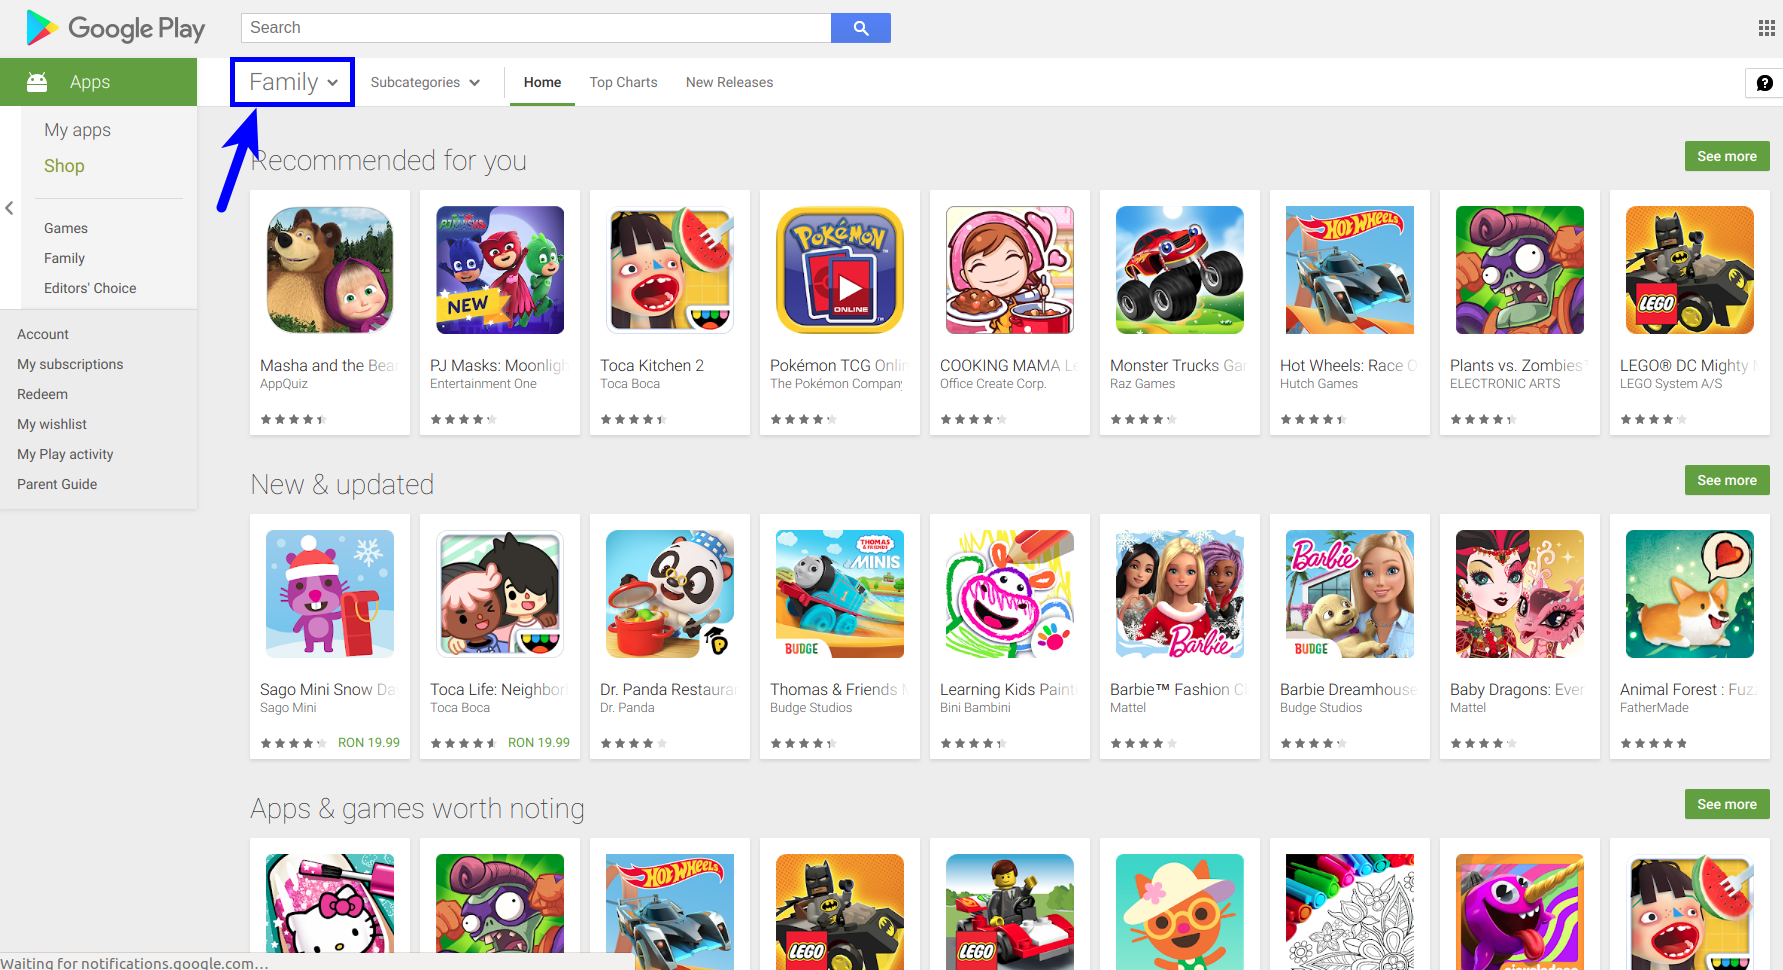

However, apps with utilitarian purposes appear to be more prominently featured on Google Play in contrast to the App Store. This observation is further substantiated by the frequency table we observe for the **Genres** column.

In [25]:
display_table(android_final, -4)

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

The distinction between the Genres and Category columns may not be immediately evident, but it's apparent that the Genres column offers a finer level of categorization with more specific categories. However, for our current analysis, we're primarily interested in the broader perspective, so we'll exclusively utilize the Category column from here on.

Thus far, we've established that the App Store is primarily filled with apps designed for entertainment, while Google Play offers a more even distribution between practical and recreational apps. Now, let's delve into understanding the types of apps that attract the most users.

# Most Popular Apps by Genre on the App Store 🍎
To ascertain the most popular genres based on user engagement (number of users), one approach is to compute the average number of installations or user ratings for each app genre. In the Google Play dataset, we can directly use the Installs column for this purpose. However, in the App Store dataset, the information about installations is not available. As a substitute, we'll utilize the total number of user ratings (rating_count_tot) as a proxy for user engagement.

Below, we proceed to calculate the average number of user ratings per app genre on the App Store:

In [26]:
genres_ios = freq_table(ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [27]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


A similar trend is observed with social networking apps, where the average number of user ratings is significantly influenced by a handful of major platforms such as Facebook, Pinterest, and Skype. The same pattern holds for music apps, where a few dominant players like Pandora, Spotify, and Shazam substantially impact the average user ratings.

Our goal is to identify popular genres, but genres like navigation, social networking, or music might appear more popular than they truly are. The average number of ratings is heavily skewed by a small number of apps with hundreds of thousands of user ratings, while numerous other apps struggle to surpass the 10,000 user rating threshold. To gain a more accurate understanding, we could improve the analysis by excluding these extremely popular apps within each genre and then recalculating the averages. However, we'll reserve this level of fine-grained analysis for a later stage.

For instance, in the "Reference" genre, the average number of user ratings is 74,942. However, this average is notably influenced by apps like the Bible and Dictionary.com, which significantly elevate the overall rating average.

In [28]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


This niche indeed presents promising potential. One viable strategy could involve transforming another well-known book into an app, enhancing it with various features beyond the raw book content. These could include daily quotes from the book, an audio version, quizzes related to the book, and even an embedded dictionary for convenient word lookups without leaving the app.

This concept aligns well with the dominance of entertainment-focused apps in the App Store. Given the market saturation with recreational apps, a practical app with unique offerings may have a better chance of standing out amid the vast number of applications on the App Store.

While exploring other popular genres, we identified weather, books, food and drink, and finance. However, some of these genres aren't particularly appealing for our venture:

* **Weather apps**: User engagement tends to be low, and revenue from in-app ads is limited. Additionally, obtaining reliable live weather data may necessitate integration with non-free APIs.

* **Food and drink apps**: Major examples include established brands like Starbucks, Dunkin' Donuts, and McDonald's, requiring actual food preparation and delivery services—beyond the scope of our current company.

* **Finance apps**: Involving banking, bill payments, money transfers, and requiring specialized domain knowledge, building a finance app would necessitate hiring a finance expert, which doesn't align with our current direction.

Hence, focusing on a practical and educational app within the book genre appears to be a viable and strategic direction for our app development initiative.

Now let's analyze the Google Play market a bit.

# Most Popular Apps by Genre on Google Play 🤖
Indeed, in the Google Play market, we possess data regarding the number of installations, allowing us to attain a clearer understanding of genre popularity. However, the install figures present a challenge as they are often imprecise, frequently expressed in open-ended ranges (e.g., 100+, 1,000+, 5,000+, etc.). This lack of granularity can make it challenging to obtain precise insights into the popularity of each genre.

In [29]:
display_table(android_final, 5) # the Installs columns

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


The data's lack of precision regarding installation numbers is a valid concern. However, for the purpose of understanding the most popular app genres, we don't require pinpoint accuracy. Our primary goal is to gain a sense of which genres attract the highest user engagement, and we can make reasonable approximations.

We'll proceed by accepting the install numbers as they are, considering an app with "100,000+" installs to have 100,000 installs, and similarly for other categories. To facilitate computations, we'll convert these install numbers to float values. This involves removing commas and plus characters to ensure a successful conversion. We'll handle this within the loop below, where we'll also calculate the average number of installs for each genre (category).

In [30]:
categories_android = freq_table(android_final, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

On average, communication apps boast the highest number of installations, with an average of approximately 38,456,119 installs. However, this average is significantly skewed due to a handful of apps with exceptionally high installation numbers. Notable examples include WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts, each surpassing one billion installations. Additionally, several other apps have achieved impressive milestones with over 100 and 500 million installations.

In [31]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [32]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

A similar trend is observed in the video players category, ranking second with an average of approximately 24,727,872 installs. The dominance of apps like YouTube, Google Play Movies & TV, and MX Player significantly influences this average. This pattern repeats in social apps (e.g., Facebook, Instagram, Google+), photography apps (Google Photos and other popular photo editors), and productivity apps (e.g., Microsoft Word, Dropbox, Google Calendar, Evernote).

The concern remains that these app genres might appear more popular than they truly are, given the overpowering presence of a few industry giants that are challenging to compete against.

The gaming genre does seem popular, but our earlier analysis indicated saturation in this market segment. Thus, we're inclined to propose a different app recommendation.

On the other hand, the "books and reference" genre appears promising, boasting an average of approximately 8,767,811 installs. Given its potential on the App Store and our objective to recommend a genre with profitability potential on both the App Store and Google Play, exploring this genre in greater detail is worthwhile.

Let's proceed by examining some apps within this genre along with their respective installation numbers.

In [33]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

In [34]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


Indeed, within the "books and reference" genre, there appears to be a concentration of a few highly popular apps, indicating that this market segment still holds significant potential. To further explore and generate app ideas, let's focus on apps that fall within a moderate range of popularity, specifically those with installations ranging from 1,000,000 to 100,000,000 downloads:

In [35]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This specific market is primarily dominated by applications focused on ebook processing, reading, and various library and dictionary collections. Hence, it may not be advisable to develop similar applications due to the substantial existing competition.

Moreover, we've observed a notable presence of Quran-centered apps, indicating the potential profitability in creating an app around a popular book. This suggests that adapting a well-known book, especially a recent one, into an app could prove lucrative in both the Google Play and App Store platforms.

However, it's evident that the market is already saturated with library-based apps. Therefore, to succeed, we must integrate unique features beyond the basic book content. These additions could encompass daily quotes from the book, an audio rendition of the book, interactive quizzes related to the book, a platform for discussions about the book, and more.

# Conclusions 📕
For this project, we examined data from the App Store and Google Play mobile applications with the aim of proposing an app profile that could yield profitability in both platforms.

Our findings suggest that transforming a popular book, possibly a recent release, into an app has the potential for profitability in both the Google Play and App Store markets. Given the market saturation of library apps, incorporating unique features beyond the core book content is crucial. These could encompass daily quotes from the book, an audio rendition of the book, interactive quizzes related to the book, a platform for book-related discussions, and more.